<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/F4/F4_Assignment7_library_3_%5B_Vaex_%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brewery Operations and Market Analysis Dataset

This dataset presents an extensive collection of data from a craft beer brewery, spanning from January 2020 to January 2024. It encapsulates a rich blend of brewing parameters, sales data, and quality assessments, providing a holistic view of the brewing process and its market implications.

[Kaggle Link](https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset)

Project Team:

LYE KAH HOOI (MCS231010)\
THONG YEE MOON (MCS231001)\
LEE SEOW MING THERESA (MCS231013)\
SITI NORAFIZAH BINTI AB AZIZ (MCS231018)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Upload the kaggle Token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thongyeemoon","key":"03b620ecbe891a539bd2b576ee07daf2"}'}

# Dataset Import

In [3]:
! pip install kaggle --quiet
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                 title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                                     DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           1943        190  1.0              
muhammadbinimran/housing-price-prediction-data                      Housing Price Prediction Data               763KB  2023-11-21 17:56:32           8690        153  1.0              
everydaycodings/produce-prices-dataset                              Fruits and Vegetables Prices Dataset        232KB  2023-12-11 13:40:33           1354         29  1.0              
thedevastator/books-sales-and-ratings                               Books Sales 

In [4]:
!kaggle datasets download -d ankurnapa/brewery-operations-and-market-analysis-dataset

100% 1.06G/1.06G [00:13<00:00, 47.4MB/s]
100% 1.06G/1.06G [00:13<00:00, 85.8MB/s]


In [5]:
!unzip -u "/content/brewery-operations-and-market-analysis-dataset.zip"

Archive:  /content/brewery-operations-and-market-analysis-dataset.zip
  inflating: brewery_data_complete_extended.csv  


# Vaex Installation

Vaex is a high performance data wrangling Python library for lazy Out-of-Core DataFrames (similar to Pandas), to visualize and explore big tabular datasets. It calculates statistics such as mean, sum, count, standard deviation etc, on an N-dimensional grid for more than a billion (10^9) samples/rows per second. Visualization is done using histograms, density plots and 3d volume rendering, allowing interactive exploration of big data. Vaex uses memory mapping, zero memory copy policy and lazy computations for best performance (no memory wasted)

\

It helps developers work with “uncomfortably large” datasets on a single machine using lazy evaluation, memory mapping, and integrations with C++ code. It’s specifically designed to work “out of core” – to process data that’s too big to be loaded into memory (RAM) all at once.

\

Vaex solves this problem by rebuilding a Pandas-like library “from the ground up,” taking advantage of lower-level C++ integrations for parallelization and lazy evaluation. Opening a 100GB dataset on a normal laptop is difficult with Pandas, but Vaex can do this efficiently, allowing developers to analyze larger datasets without compute clusters.

In [6]:
%%capture
%%bash
python -m pip install -U pip
python -m pip install vaex-core
python -m pip install vaex-hdf5
python -m pip install -U ipython ipykernel

In [7]:
pip install vaex-viz

In [8]:
import vaex
import gc
import numpy as np
import pandas as pd
import warnings
import time
import gc
import os

# Function for Comparison

## Read file

In [9]:
%%time

df = vaex.open('/content/brewery_data_complete_extended.csv')

CPU times: user 1.79 s, sys: 246 ms, total: 2.03 s
Wall time: 2.11 s


In [10]:
%%time
df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204250857069873,5.2898454476095615,1.0395041267301979,5.370842159553436,20,5,1:0.32:0.16,4666,2664.7593448382822,8.57701633109399,89.19588216376087,4.1049876591878345,3.2354851724654683,4.663204448186049
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086762947259544,5.275643382756193,1.0598189516987164,5.096053082797625,36,14,1:0.39:0.24,832,9758.801062471319,7.420540752553908,72.4809153900275,2.6765280953921122,4.2461292104108574,2.04435836917023
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539332669116469,4.7780156232459765,1.0374757095487201,4.824737120959184,30,10,1:0.35:0.16,2115,11721.087016274963,8.451364886803127,86.32214396020584,3.299893625514981,3.109440467362847,3.0338798378762806
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.41848910394318,5.345260585546188,1.0524314251694946,5.509243080797997,48,18,1:0.35:0.15,3173,12050.177463190277,9.671859404043175,83.09494037181545,2.136055116262562,4.634254174098425,1.4898890677148424
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144907654338517,4.86185374113861,1.0542961149482333,5.133624684263243,57,13,1:0.46:0.11,4449,5515.0774647529615,7.895333676172065,88.62583302052388,4.491723843594972,2.1833886016455497,2.9906302188791485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,999,995",4575645,2023-12-31 23:58:59,Stout,Bottles,Yelahanka,12,20.719150891955422,4.944343208805361,1.0498763363614083,5.43713925537552,28,15,1:0.31:0.17,3054,6655.67383564915,6.264103925468877,79.6548150585106,4.612467540512821,1.4843886249579246,1.1186123399725973
"9,999,996",2074362,2023-12-31 23:59:18,Wheat Beer,Bottles,Electronic City,19,16.970908070607415,5.1219626073319,1.037019058817327,5.102428213127099,47,6,1:0.30:0.19,1985,10440.357816764359,9.651172255369218,89.11920096236504,2.112756384714795,1.1509463525290302,4.972988292838757
"9,999,997",177617,2023-12-31 23:59:41,IPA,Bottles,Malleswaram,10,24.386183588470104,4.747588087451058,1.0474898379446889,5.025250599461387,24,6,1:0.43:0.14,1982,17069.57285499178,9.060614192398543,72.55545544997851,3.3938563447699215,3.0112406937044605,2.1150542805453982
"9,999,998",7306891,2023-12-31 23:59:45,Ale,Kegs,Electronic City,18,18.056171610571347,5.007908502745378,1.0461376608233728,5.843181388461357,58,17,1:0.41:0.25,4016,5316.412808264866,6.2975618911741815,87.65089861853443,4.095873974557819,4.71150168181813,1.5356201670791085


## Data Understanding

In [11]:
%%time

df.head(5)

CPU times: user 1.54 ms, sys: 0 ns, total: 1.54 ms
Wall time: 1.82 ms


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.2043,5.28985,1.0395,5.37084,20,5,1:0.32:0.16,4666,2664.76,8.57702,89.1959,4.10499,3.23549,4.6632
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.0868,5.27564,1.05982,5.09605,36,14,1:0.39:0.24,832,9758.8,7.42054,72.4809,2.67653,4.24613,2.04436
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.5393,4.77802,1.03748,4.82474,30,10,1:0.35:0.16,2115,11721.1,8.45136,86.3221,3.29989,3.10944,3.03388
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.4185,5.34526,1.05243,5.50924,48,18,1:0.35:0.15,3173,12050.2,9.67186,83.0949,2.13606,4.63425,1.48989
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.1449,4.86185,1.0543,5.13362,57,13,1:0.46:0.11,4449,5515.08,7.89533,88.6258,4.49172,2.18339,2.99063


In [12]:
%%time

df.info()

column,type,unit,description,expression
Batch_ID,int64,,,
Brew_Date,datetime64[s],,,
Beer_Style,str,,,
SKU,str,,,
Location,str,,,
Fermentation_Time,int64,,,
Temperature,float64,,,
pH_Level,float64,,,
Gravity,float64,,,
Alcohol_Content,float64,,,


CPU times: user 2.66 s, sys: 274 ms, total: 2.93 s
Wall time: 3.6 s


In [13]:
%%time

df.describe()

CPU times: user 5min 17s, sys: 27.3 s, total: 5min 44s
Wall time: 4min


,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
data_type,int64,datetime64[s],string,string,string,int64,float64,float64,float64,float64,int64,int64,string,int64,float64,float64,float64,float64,float64,float64
count,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000,10000000
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,4999999.5,2021-12-31T12:24:42,--,--,--,14.500898,19.999898511017154,4.999940543893731,1.055002870078875,5.249709006579451,39.4961996,11.9993459,--,2749.0309594,10497.785343937843,7.99982514819217,80.00091934183457,3.000081497043089,3.000002413212676,3.000158710675014
std,2886751.345959,36441199.750714,--,--,--,2.872006,2.88703,0.288638,0.014435,0.432961,11.545572,4.32117,--,1299.078068,5485.995271,1.154679,5.774929,1.154748,1.154827,1.154719
min,0,2020-01-01T00:00:00,--,--,--,10,15.000001,4.5,1.03,4.5,20,5,--,500,1000.000963,6.000001,70.000007,1.0,1.000001,1.0
max,9999999,2024-01-01T00:00:00,--,--,--,19,24.999998,5.5,1.08,6.0,59,19,--,4999,19999.999641,9.999999,90.0,5.0,5.0,5.0


## Count

In [14]:
print(f"size: {len(df)} with {len(df.columns)} columns")

size: 10000000 with 20 columns


In [15]:
%%time
len(df)

CPU times: user 22 µs, sys: 2 µs, total: 24 µs
Wall time: 28.1 µs


10000000

In [16]:
%%time
count_ft = df['Fermentation_Time'].count()

CPU times: user 14.7 s, sys: 924 ms, total: 15.6 s
Wall time: 8.92 s


## Mean

In [17]:
%%time

#integer
df.Fermentation_Time.mean()

CPU times: user 15 s, sys: 1.13 s, total: 16.1 s
Wall time: 11.1 s


array(14.500898)

In [18]:
%%time

#float
df.Temperature.mean()

CPU times: user 15.1 s, sys: 1.03 s, total: 16.1 s
Wall time: 10.8 s


array(19.99989851)

## Standard Deviation

In [19]:
%%time

#integer
df.Fermentation_Time.std()

CPU times: user 15.3 s, sys: 911 ms, total: 16.2 s
Wall time: 10.6 s


2.8720059529179296

## Sum columns

In [20]:
%%time

df['Fermentation_Time'] + df['Bitterness']

CPU times: user 326 µs, sys: 0 ns, total: 326 µs
Wall time: 332 µs


Expression = (Fermentation_Time + Bitterness)
Length: 10,000,000 dtype: int64 (expression)
--------------------------------------------
      0  36
      1  49
      2  42
      3  65
      4  75
    ...    
9999995  40
9999996  66
9999997  34
9999998  76
9999999  31

## Sum columns mean

In [21]:
%%time

(df['Fermentation_Time'] + df['Bitterness']).mean()

CPU times: user 16 s, sys: 1.11 s, total: 17.1 s
Wall time: 10.1 s


array(53.9970976)

## Value Counts

In [22]:
%%time

df.Fermentation_Time.value_counts()

CPU times: user 15 s, sys: 968 ms, total: 16 s
Wall time: 10.9 s


13    1002039
17    1001838
18    1001023
11    1000379
15     999727
19     999499
12     999128
14     999084
16     998786
10     998497
dtype: int64

## Group-by

In [23]:
%%time
df_group=df.groupby(by='Beer_Style').agg({'Fermentation_Time':['mean','std'],'Temperature':['mean','std']})
df_group

CPU times: user 38.7 s, sys: 3.72 s, total: 42.4 s
Wall time: 28.2 s


#,Beer_Style,Fermentation_Time_mean,Fermentation_Time_std,Temperature_mean,Temperature_std
0,Stout,14.5032,2.87261,19.9984,2.88808
1,Lager,14.5013,2.87213,20.0019,2.88556
2,Pilsner,14.501,2.87251,19.9977,2.88799
3,Ale,14.501,2.86997,19.9996,2.88509
4,Sour,14.5005,2.87125,20.0033,2.89015
5,IPA,14.4991,2.87086,19.996,2.88703
6,Wheat Beer,14.5039,2.8727,20.0028,2.88625
7,Porter,14.4973,2.87401,19.9993,2.88607


In [24]:
%%time
df_temp=df.groupby(df.Beer_Style,agg=vaex.agg.mean(df.Temperature))
df_temp

CPU times: user 34.3 s, sys: 3.05 s, total: 37.4 s
Wall time: 23.7 s


#,Beer_Style,Temperature_mean
0,Stout,19.9984
1,Lager,20.0019
2,Pilsner,19.9977
3,Ale,19.9996
4,Sour,20.0033
5,IPA,19.996
6,Wheat Beer,20.0028
7,Porter,19.9993


In [25]:
%%time
df.groupby(df.Beer_Style,agg='count')

CPU times: user 33.4 s, sys: 3.03 s, total: 36.4 s
Wall time: 24.4 s


#,Beer_Style,count
0,Stout,1250296
1,Lager,1249570
2,Pilsner,1249426
3,Ale,1251002
4,Sour,1250307
5,IPA,1249603
6,Wheat Beer,1249023
7,Porter,1250773


## Join

In [26]:
%%time
df_joined=df.join(df_temp,on='Beer_Style')
df_joined

CPU times: user 17 s, sys: 1.39 s, total: 18.4 s
Wall time: 12 s


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,Temperature_mean
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204250857069873,5.2898454476095615,1.0395041267301979,5.370842159553436,20,5,1:0.32:0.16,4666,2664.7593448382822,8.57701633109399,89.19588216376087,4.1049876591878345,3.2354851724654683,4.663204448186049,20.002825222407186
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086762947259544,5.275643382756193,1.0598189516987164,5.096053082797625,36,14,1:0.39:0.24,832,9758.801062471319,7.420540752553908,72.4809153900275,2.6765280953921122,4.2461292104108574,2.04435836917023,20.003314397183836
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539332669116469,4.7780156232459765,1.0374757095487201,4.824737120959184,30,10,1:0.35:0.16,2115,11721.087016274963,8.451364886803127,86.32214396020584,3.299893625514981,3.109440467362847,3.0338798378762806,20.002825222407186
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.41848910394318,5.345260585546188,1.0524314251694946,5.509243080797997,48,18,1:0.35:0.15,3173,12050.177463190277,9.671859404043175,83.09494037181545,2.136055116262562,4.634254174098425,1.4898890677148424,19.99962696331174
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144907654338517,4.86185374113861,1.0542961149482333,5.133624684263243,57,13,1:0.46:0.11,4449,5515.0774647529615,7.895333676172065,88.62583302052388,4.491723843594972,2.1833886016455497,2.9906302188791485,19.99839358401279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,999,995",4575645,2023-12-31 23:58:59,Stout,Bottles,Yelahanka,12,20.719150891955422,4.944343208805361,1.0498763363614083,5.43713925537552,28,15,1:0.31:0.17,3054,6655.67383564915,6.264103925468877,79.6548150585106,4.612467540512821,1.4843886249579246,1.1186123399725973,19.99839358401279
"9,999,996",2074362,2023-12-31 23:59:18,Wheat Beer,Bottles,Electronic City,19,16.970908070607415,5.1219626073319,1.037019058817327,5.102428213127099,47,6,1:0.30:0.19,1985,10440.357816764359,9.651172255369218,89.11920096236504,2.112756384714795,1.1509463525290302,4.972988292838757,20.002825222407186
"9,999,997",177617,2023-12-31 23:59:41,IPA,Bottles,Malleswaram,10,24.386183588470104,4.747588087451058,1.0474898379446889,5.025250599461387,24,6,1:0.43:0.14,1982,17069.57285499178,9.060614192398543,72.55545544997851,3.3938563447699215,3.0112406937044605,2.1150542805453982,19.99604631096913
"9,999,998",7306891,2023-12-31 23:59:45,Ale,Kegs,Electronic City,18,18.056171610571347,5.007908502745378,1.0461376608233728,5.843181388461357,58,17,1:0.41:0.25,4016,5316.412808264866,6.2975618911741815,87.65089861853443,4.095873974557819,4.71150168181813,1.5356201670791085,19.99962696331174


In [27]:
%%time
df_joined2=df.join(df_group,on='Beer_Style')
df_joined2

CPU times: user 16.9 s, sys: 1.58 s, total: 18.5 s
Wall time: 12 s


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,Fermentation_Time_mean,Fermentation_Time_std,Temperature_mean,Temperature_std
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204250857069873,5.2898454476095615,1.0395041267301979,5.370842159553436,20,5,1:0.32:0.16,4666,2664.7593448382822,8.57701633109399,89.19588216376087,4.1049876591878345,3.2354851724654683,4.663204448186049,14.503903450937253,2.8727031641231977,20.002825222406557,2.886246555888565
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086762947259544,5.275643382756193,1.0598189516987164,5.096053082797625,36,14,1:0.39:0.24,832,9758.801062471319,7.420540752553908,72.4809153900275,2.6765280953921122,4.2461292104108574,2.04435836917023,14.500461086757092,2.8712494219343494,20.003314397183836,2.8901495596194122
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539332669116469,4.7780156232459765,1.0374757095487201,4.824737120959184,30,10,1:0.35:0.16,2115,11721.087016274963,8.451364886803127,86.32214396020584,3.299893625514981,3.109440467362847,3.0338798378762806,14.503903450937253,2.8727031641231977,20.002825222406557,2.886246555888565
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.41848910394318,5.345260585546188,1.0524314251694946,5.509243080797997,48,18,1:0.35:0.15,3173,12050.177463190277,9.671859404043175,83.09494037181545,2.136055116262562,4.634254174098425,1.4898890677148424,14.501019183022889,2.869973655385911,19.999626963312334,2.885093726183622
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144907654338517,4.86185374113861,1.0542961149482333,5.133624684263243,57,13,1:0.46:0.11,4449,5515.0774647529615,7.895333676172065,88.62583302052388,4.491723843594972,2.1833886016455497,2.9906302188791485,14.503156852457337,2.8726073153924827,19.998393584013893,2.888080379410921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,999,995",4575645,2023-12-31 23:58:59,Stout,Bottles,Yelahanka,12,20.719150891955422,4.944343208805361,1.0498763363614083,5.43713925537552,28,15,1:0.31:0.17,3054,6655.67383564915,6.264103925468877,79.6548150585106,4.612467540512821,1.4843886249579246,1.1186123399725973,14.503156852457337,2.8726073153924827,19.998393584013893,2.888080379410921
"9,999,996",2074362,2023-12-31 23:59:18,Wheat Beer,Bottles,Electronic City,19,16.970908070607415,5.1219626073319,1.037019058817327,5.102428213127099,47,6,1:0.30:0.19,1985,10440.357816764359,9.651172255369218,89.11920096236504,2.112756384714795,1.1509463525290302,4.972988292838757,14.503903450937253,2.8727031641231977,20.002825222406557,2.886246555888565
"9,999,997",177617,2023-12-31 23:59:41,IPA,Bottles,Malleswaram,10,24.386183588470104,4.747588087451058,1.0474898379446889,5.025250599461387,24,6,1:0.43:0.14,1982,17069.57285499178,9.060614192398543,72.55545544997851,3.3938563447699215,3.0112406937044605,2.1150542805453982,14.499066503521519,2.8708610099024736,19.99604631096842,2.887031953789534
"9,999,998",7306891,2023-12-31 23:59:45,Ale,Kegs,Electronic City,18,18.056171610571347,5.007908502745378,1.0461376608233728,5.843181388461357,58,17,1:0.41:0.25,4016,5316.412808264866,6.2975618911741815,87.65089861853443,4.095873974557819,4.71150168181813,1.5356201670791085,14.501019183022889,2.869973655385911,19.999626963312334,2.885093726183622


## EDA Visualization

Vaex has no built-in method intended for plotting a scatter or line plot for lots of data. Its performance boost comes when plotting aggregate statistics like heatmaps, histograms

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
df.info()

column,type,unit,description,expression
Batch_ID,int64,,,
Brew_Date,datetime64[s],,,
Beer_Style,str,,,
SKU,str,,,
Location,str,,,
Fermentation_Time,int64,,,
Temperature,float64,,,
pH_Level,float64,,,
Gravity,float64,,,
Alcohol_Content,float64,,,


### Barplot

In [30]:
%%time

Beer_count = df.Beer_Style.value_counts().rename_axis('Beer').reset_index(name='count')
Beer_count

CPU times: user 18.2 s, sys: 1.47 s, total: 19.7 s
Wall time: 11.9 s


,Beer,count
0,Ale,1251002
1,Porter,1250773
2,Sour,1250307
3,Stout,1250296
4,IPA,1249603
5,Lager,1249570
6,Pilsner,1249426
7,Wheat Beer,1249023


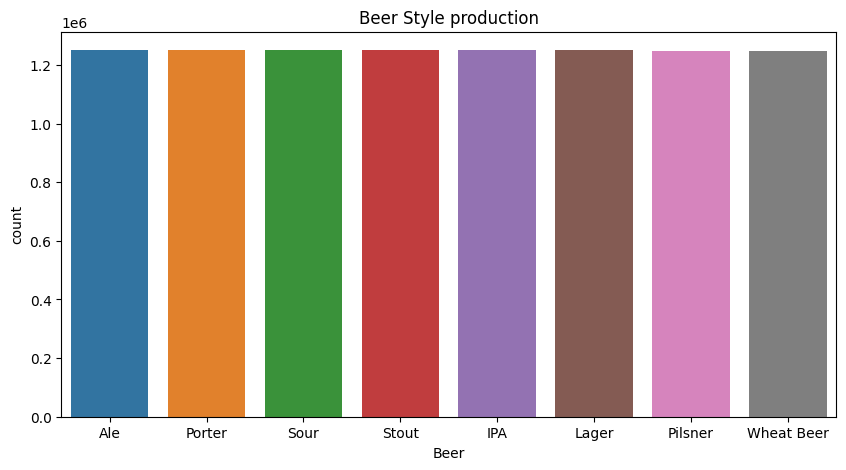

CPU times: user 465 ms, sys: 86.6 ms, total: 552 ms
Wall time: 579 ms


In [31]:
# show barplot

%%time
plt.figure(figsize=(10,5))
sns.barplot(x='Beer', y='count',data=Beer_count).set(title="Beer Style production")
plt.show()

### Boxplot

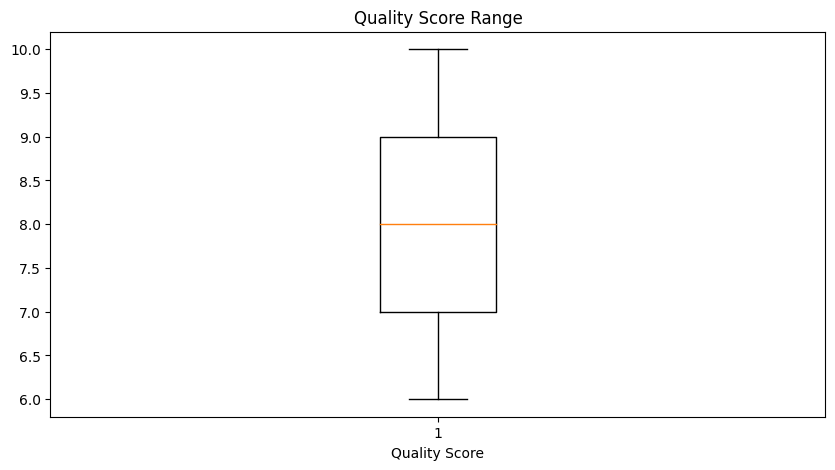

CPU times: user 16.8 s, sys: 1.49 s, total: 18.3 s
Wall time: 12.5 s


In [32]:
%%time
plt.figure(figsize=(10,5))
plt.boxplot(x=df.Quality_Score)
plt.title('Quality Score Range')
plt.xlabel('Quality Score')
# sns.boxplot(x='Quality_Score',data=df,showfliers=False)
plt.show()

### Scatterplot

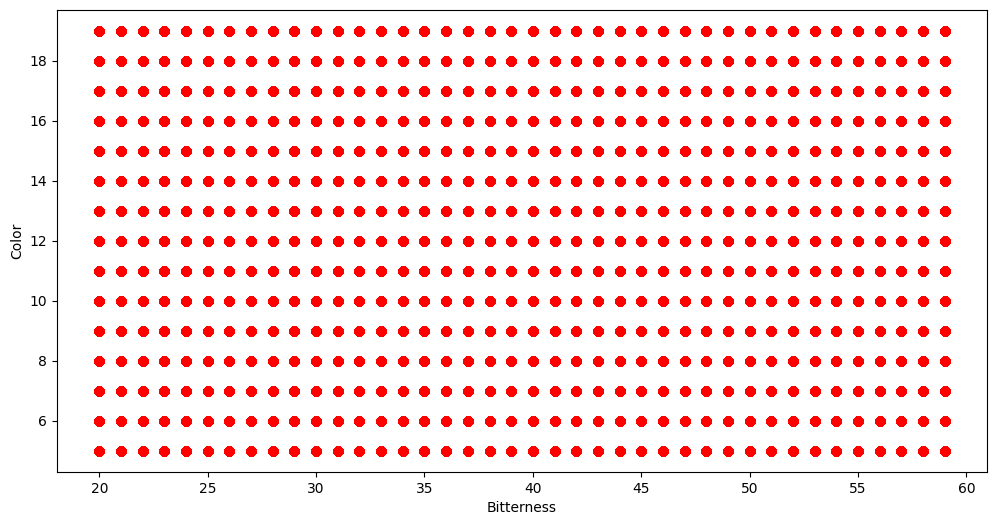

CPU times: user 1min 9s, sys: 3.73 s, total: 1min 13s
Wall time: 1min 12s


In [52]:
%%time
## Reduce the size of data by applying Selection Quality Score Above mean score > 6
x = df.evaluate("Bitterness", selection="Quality_Score > 5")
y = df.evaluate("Color", selection="Quality_Score >5")

plt.figure(figsize=(12,6))
plt.scatter(x, y, c="red", alpha=0.5)
plt.xlabel('Bitterness')
plt.ylabel('Color')
plt.show()

### Lineplot

In [71]:
%%time
df['year'] = df['Brew_Date'].dt.year
df['month'] = df['Brew_Date'].dt.month
df['day'] = df['Brew_Date'].dt.day

In [86]:
%%time
df_filtered = df[((df.year==2023))&(df.month==1)&((df.Location=="HSR Layout"))&((df.Beer_Style=="Wheat Beer"))&((df.SKU=="Bottles"))&(df.Quality_Score>5)]
df_filtered.head(3)

CPU times: user 48.9 s, sys: 4.18 s, total: 53.1 s
Wall time: 40.6 s


#,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,year,month,day
0,4863135,2023-01-01 00:00:23,Wheat Beer,Bottles,HSR Layout,11,22.7509,5.19796,1.04534,4.52882,31,19,1:0.29:0.18,4808,13583.6,8.40172,70.0953,3.90335,2.40049,2.55677,2023,1,1
1,7834288,2023-01-01 00:06:26,Wheat Beer,Bottles,HSR Layout,18,20.2731,5.28229,1.06484,5.29668,34,10,1:0.46:0.14,2868,14185.5,6.38955,83.7343,3.48013,4.30614,4.31386,2023,1,1
2,6305750,2023-01-01 03:17:45,Wheat Beer,Bottles,HSR Layout,11,15.0858,4.77645,1.04512,5.35282,35,19,1:0.41:0.27,4841,10183.8,9.14702,81.687,1.4489,4.88499,4.44435,2023,1,1


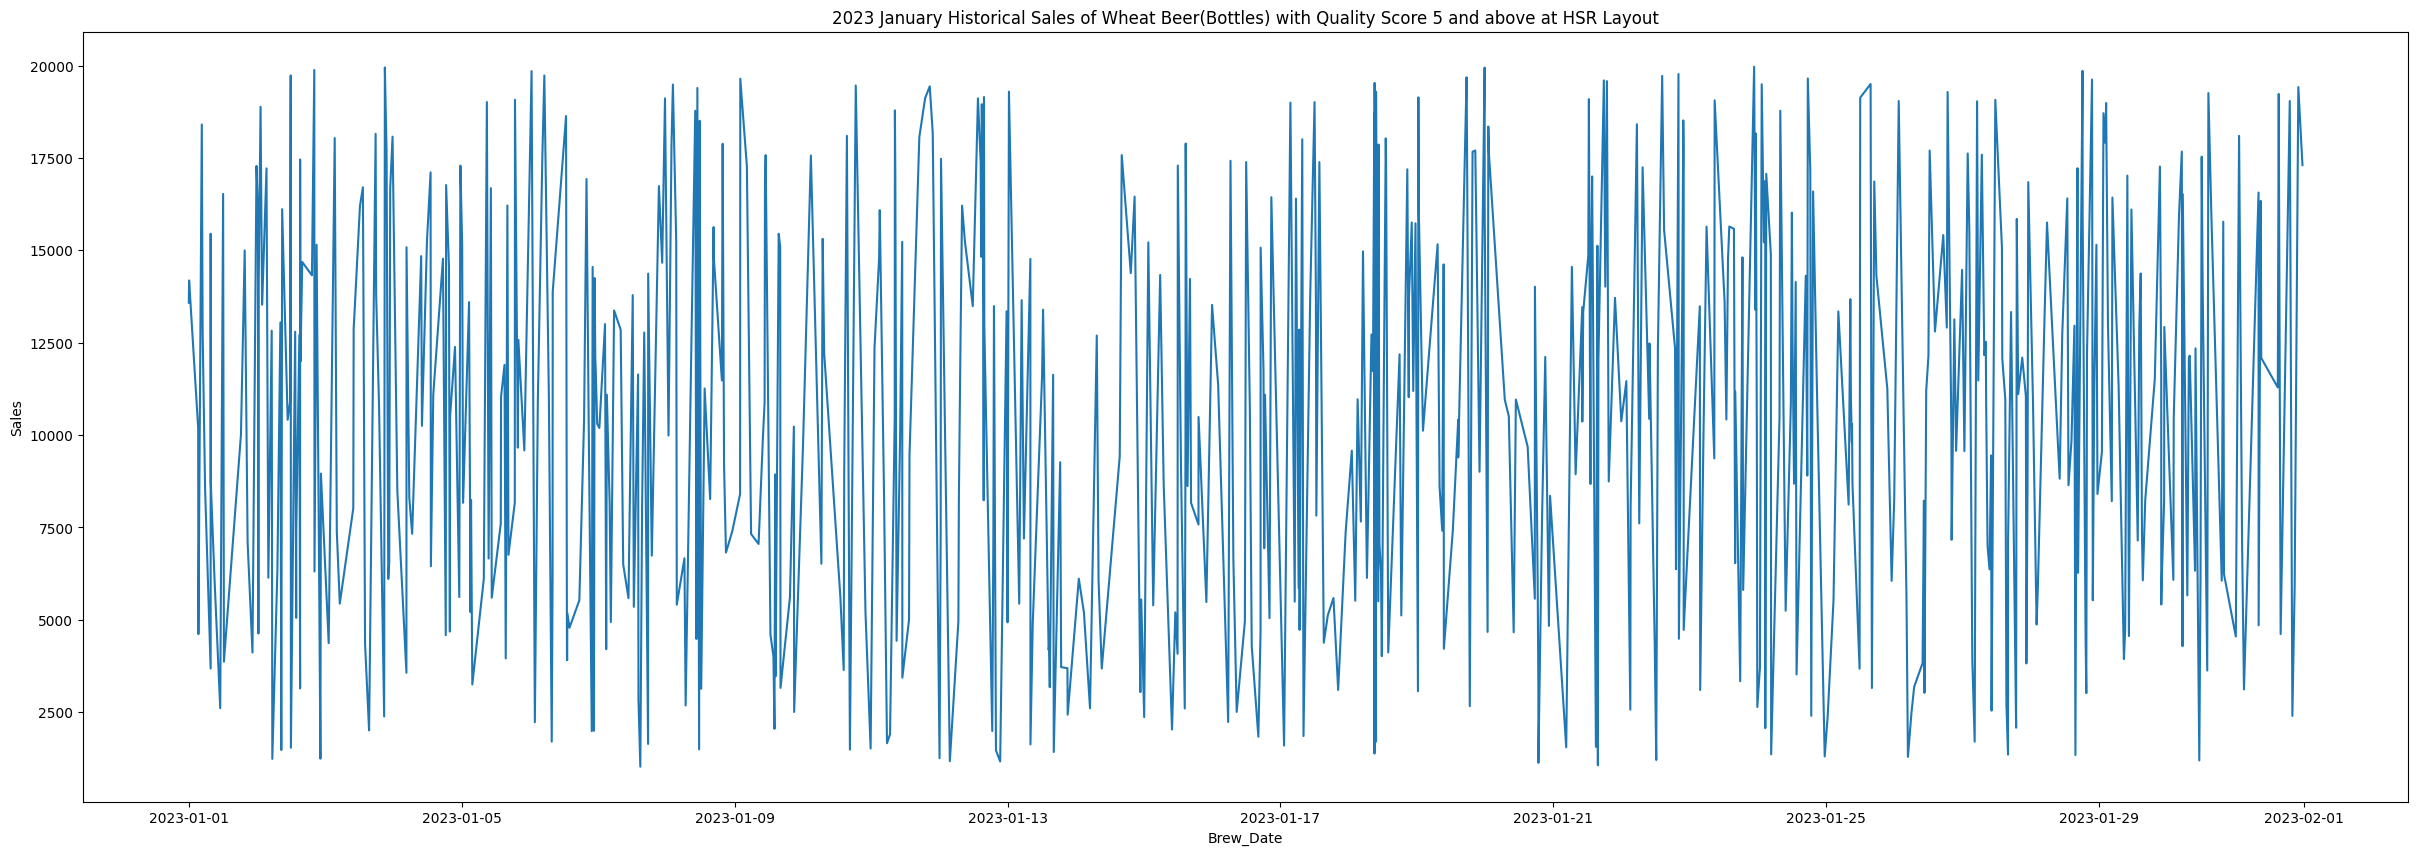

CPU times: user 46.6 s, sys: 3.43 s, total: 50 s
Wall time: 34.2 s


In [89]:
%%time
# Plot the historical Sales
plt.figure(figsize=(30,10))
plt.plot(df_filtered.Brew_Date, df_filtered.Total_Sales)
plt.xlabel('Brew_Date')
plt.ylabel('Sales')
plt.title('2023 January Historical Sales of Wheat Beer(Bottles) with Quality Score 5 and above at HSR Layout')
plt.show()

### Viz Histogram / Plot 1D

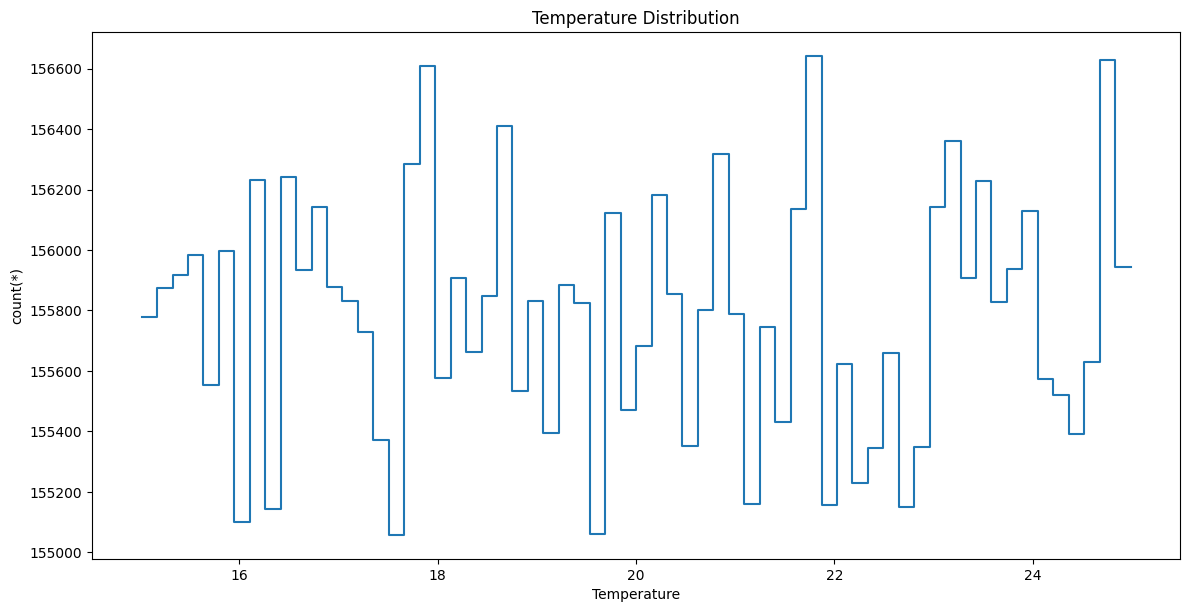

CPU times: user 50.3 s, sys: 3.25 s, total: 53.5 s
Wall time: 35.7 s


In [37]:
%%time
plt.figure(figsize=(12,6))
df.viz.histogram(df.Temperature, limits='99.7%')
plt.title('Temperature Distribution')
plt.show()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


/usr/local/lib/python3.10/dist-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


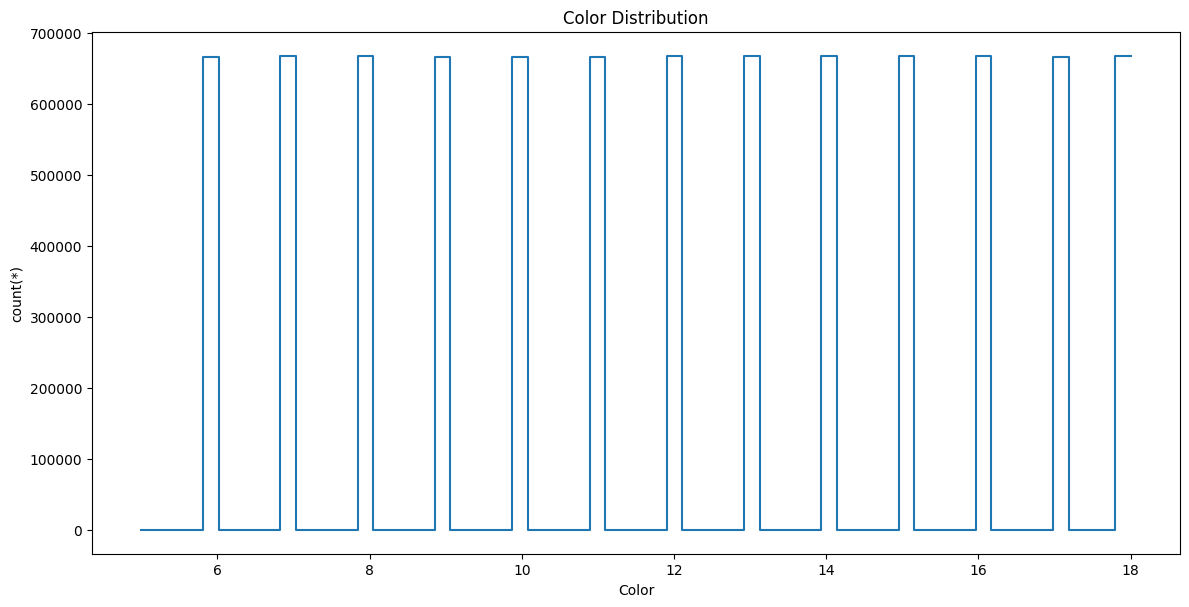

In [38]:
%time
plt.figure(figsize=(12,6))
df.plot1d(df.Color,limits='99.7%')
plt.title('Color Distribution')
plt.show()

### Plot 2D/Heatmap with 2 variables

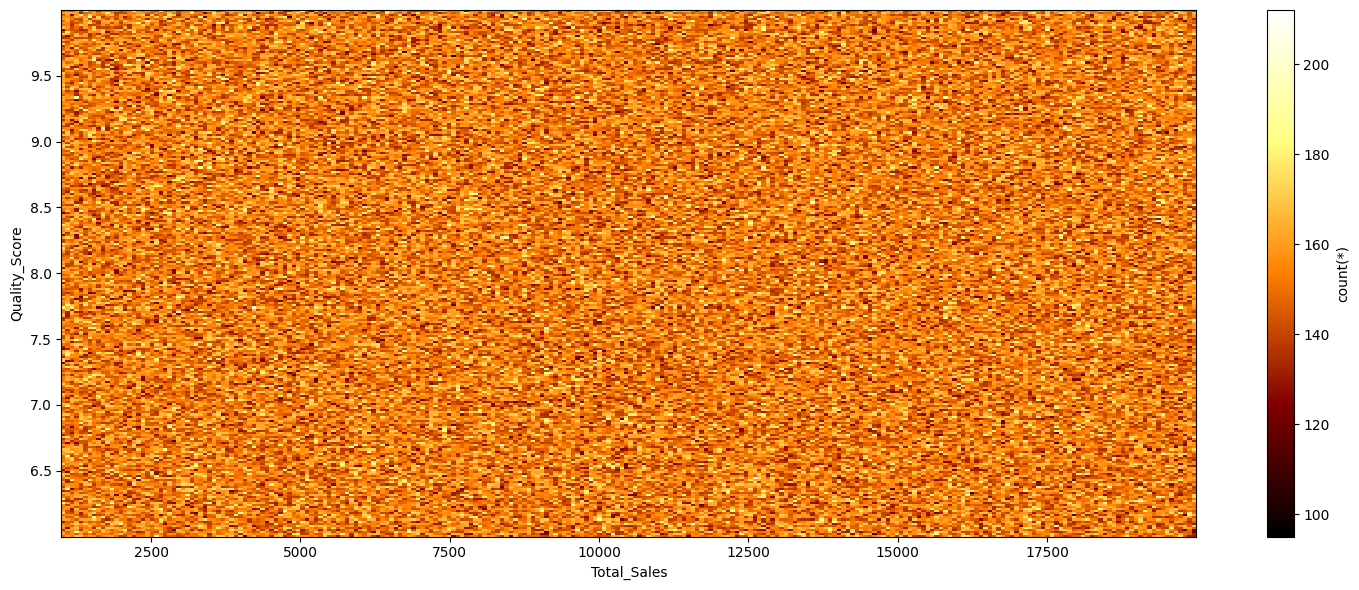

CPU times: user 39.2 s, sys: 2.71 s, total: 41.9 s
Wall time: 31.7 s


In [68]:
%%time

plt.figure(figsize=(15,6))
df.viz.heatmap(df.Total_Sales , df.Quality_Score)
plt.show()

# 6 EDA Question

##   1. What is the distribution of Alcohol Content in the dataset?

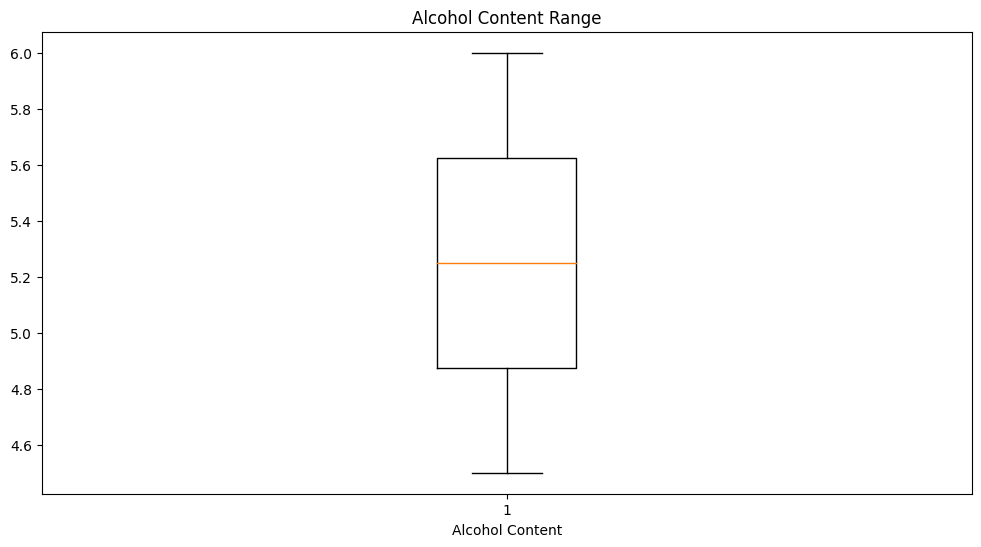

CPU times: user 18.5 s, sys: 1.81 s, total: 20.3 s
Wall time: 21.3 s


In [40]:
%%time
plt.figure(figsize=(12,6))
plt.boxplot(x=df.Alcohol_Content)
plt.title('Alcohol Content Range')
plt.xlabel('Alcohol Content')
plt.show()

## 2. Is there a relationship between pH Level and Bitterness in the brewing process?

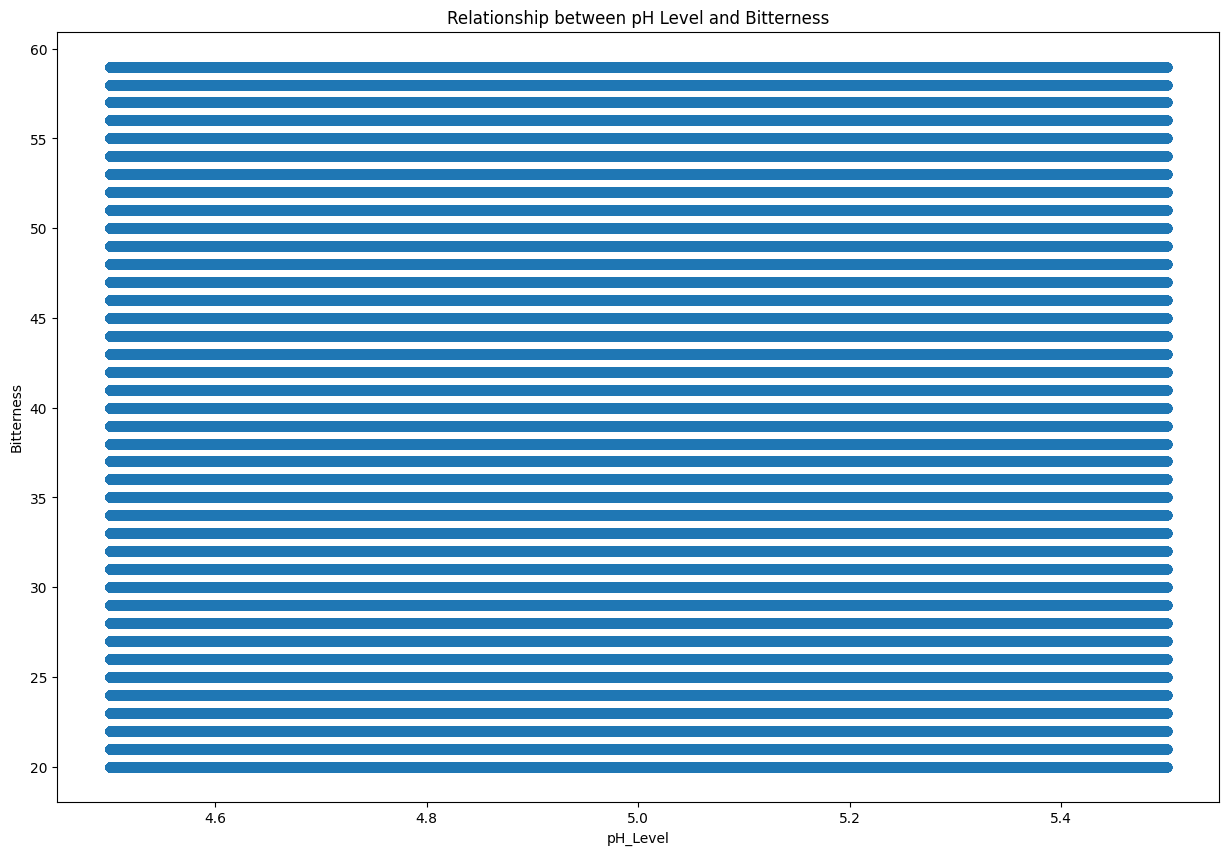

CPU times: user 1min 10s, sys: 4.13 s, total: 1min 14s
Wall time: 1min 12s


In [41]:
## Reduce the size of data by applying Selection Quality Score Above mean score which is 6

%%time
x = df.evaluate("pH_Level", selection="Quality_Score > 6")
y = df.evaluate("Bitterness", selection="Quality_Score > 6")

plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.title('Relationship between pH Level and Bitterness')
plt.xlabel('pH_Level')
plt.ylabel('Bitterness')
plt.show()

## 3. What are the top 5 Beer Styles based on Total Sales?

In [42]:
%%time
## Calculate the total sales of each beer type

beer_ranking=df.groupby(by='Beer_Style').agg({'Total_Sales': ['sum']})
beer_ranking


CPU times: user 39 s, sys: 2.94 s, total: 41.9 s
Wall time: 28.7 s


#,Beer_Style,Total_Sales_sum
0,Stout,1.3115e+10
1,Lager,1.31177e+10
2,Pilsner,1.31224e+10
3,Ale,1.31464e+10
4,Sour,1.31255e+10
5,IPA,1.31136e+10
6,Wheat Beer,1.31068e+10
7,Porter,1.31305e+10


In [43]:
beer_ranking.Beer_Style

Expression = Beer_Style
Length: 8 dtype: large_string (column)
--------------------------------------
0       Stout
1       Lager
2     Pilsner
3         Ale
4        Sour
5         IPA
6  Wheat Beer
7      Porter

In [44]:
x= list(map(str,beer_ranking.Beer_Style.values))
x

['Stout', 'Lager', 'Pilsner', 'Ale', 'Sour', 'IPA', 'Wheat Beer', 'Porter']

In [45]:
y= list(map(int,beer_ranking.Total_Sales_sum.values))
type(y)

list

In [46]:
beer_rank=pd.DataFrame({"Beer_Style":x,"Total_Sales":y})
# beer_rank=vaex.from_pandas(beer_rank)
beer_rank

,Beer_Style,Total_Sales
0,Stout,13115025836
1,Lager,13117665386
2,Pilsner,13122350032
3,Ale,13146382710
4,Sour,13125541866
5,IPA,13113569204
6,Wheat Beer,13106806375
7,Porter,13130512026


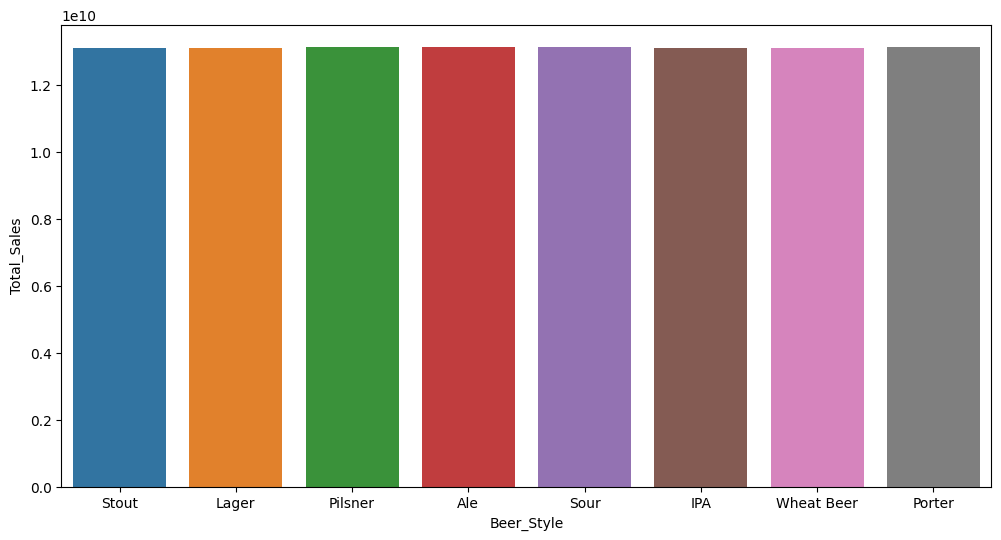

CPU times: user 311 ms, sys: 62.5 ms, total: 374 ms
Wall time: 406 ms


In [47]:
%%time
plt.figure(figsize=(12, 6))
# sns.barplot(x='Beer_Style',y='Total_Sales_sum',data=(beer_ranking))
sns.barplot(x=beer_rank.Beer_Style,y=beer_rank.Total_Sales,data=(beer_rank))
plt.show()

## 4. Which Location produced the most beer?

In [48]:
%%time

Location_count = df.Location.value_counts().rename_axis('Location').reset_index(name='count')
Location_count

CPU times: user 19.7 s, sys: 1.58 s, total: 21.3 s
Wall time: 15.5 s


,Location,count
0,HSR Layout,1000789
1,Jayanagar,1000760
2,Koramangala,1000220
3,Marathahalli,1000164
4,Rajajinagar,1000147
5,Indiranagar,999887
6,Yelahanka,999818
7,Malleswaram,999629
8,Electronic City,999307
9,Whitefield,999279


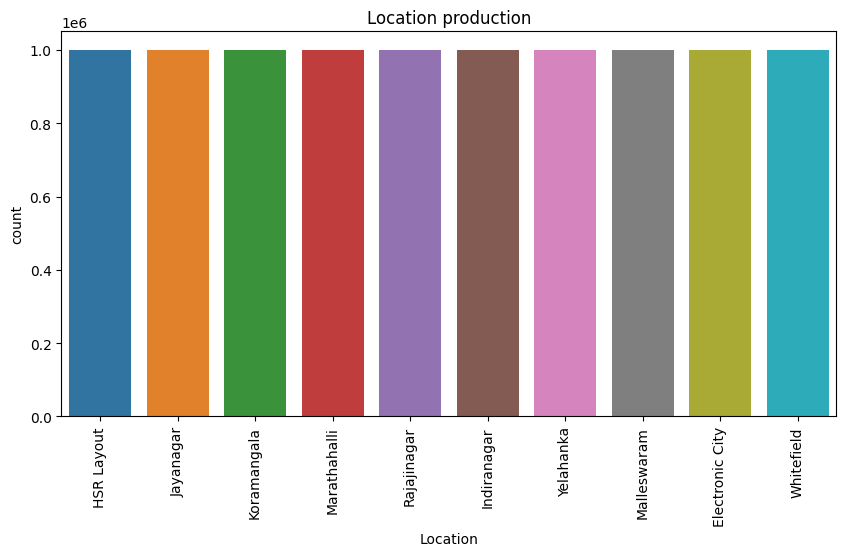

CPU times: user 303 ms, sys: 107 ms, total: 410 ms
Wall time: 300 ms


In [58]:
# show barplot

%%time
plt.figure(figsize=(10,5))
sns.barplot(x='Location', y='count',data=Location_count).set(title="Location production")
plt.xticks(rotation='vertical')
plt.show()

## 5. What is the distribution of Fermentation Time, and are there any outliers?

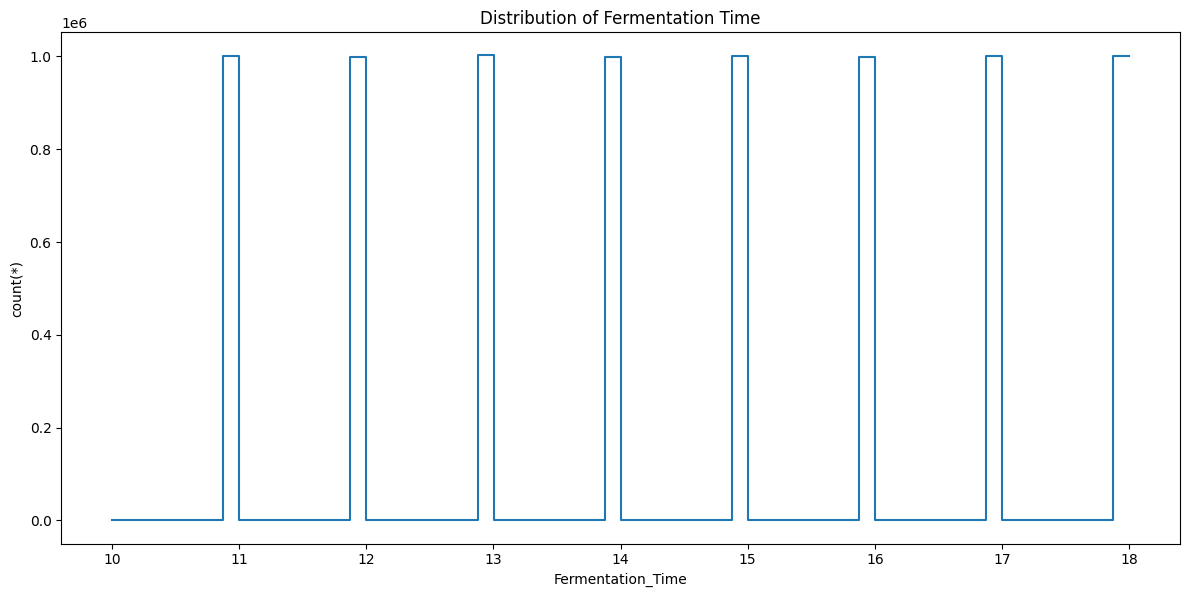

CPU times: user 55.4 s, sys: 4.36 s, total: 59.8 s
Wall time: 57.2 s


In [50]:
%%time
plt.figure(figsize=(12,6))
df.viz.histogram(df.Fermentation_Time, limits='99.7%')
plt.title('Distribution of Fermentation Time')
plt.show()

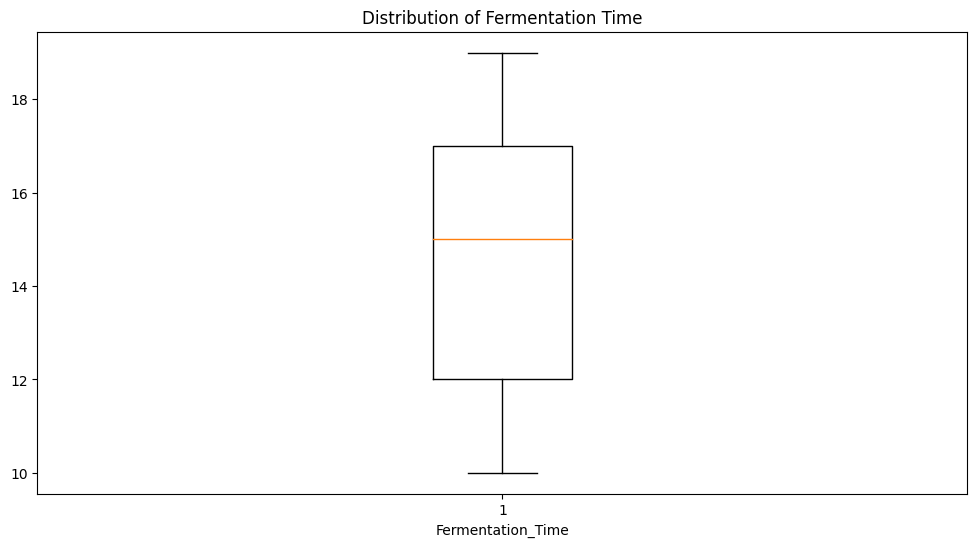

CPU times: user 17.7 s, sys: 1.31 s, total: 19.1 s
Wall time: 14.6 s


In [59]:
%%time
plt.figure(figsize=(12,6))
plt.boxplot(x=df.Fermentation_Time)
plt.title('Distribution of Fermentation Time')
plt.xlabel('Fermentation_Time')
plt.show()

## 6. What is the Correlation between Alcohol Content and Quality Score ?

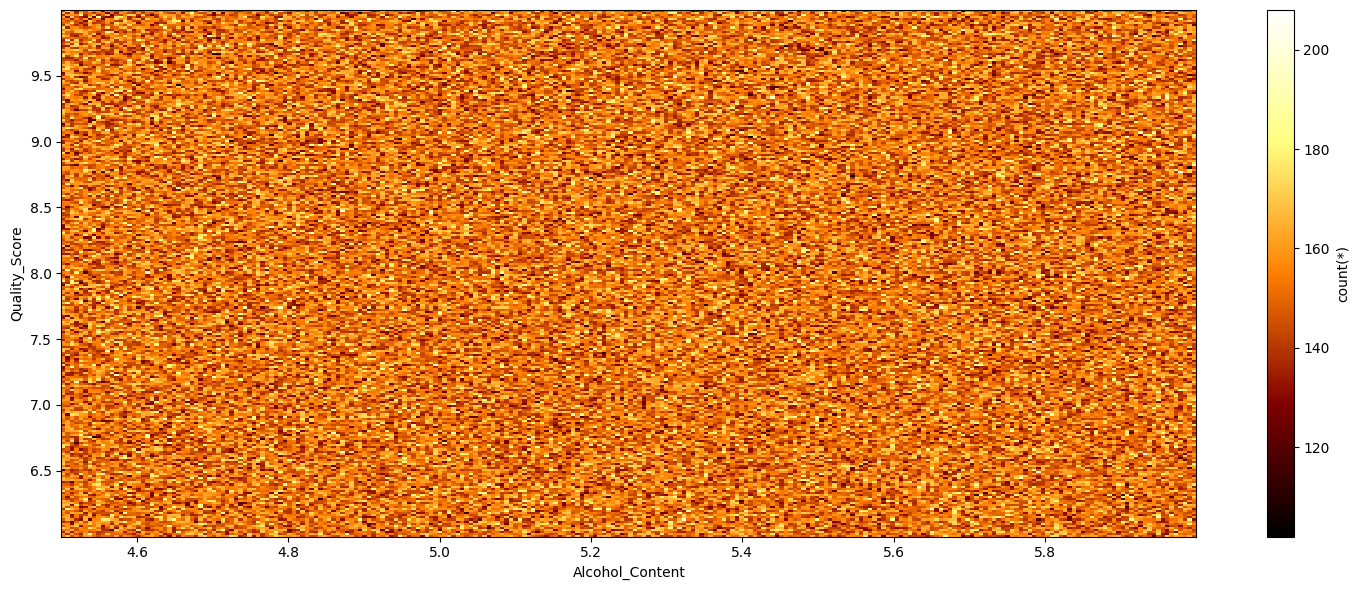

CPU times: user 38.7 s, sys: 2.76 s, total: 41.5 s
Wall time: 31.2 s


In [67]:
%%time

plt.figure(figsize=(15,6))
df.viz.heatmap(df.Alcohol_Content, df.Quality_Score)
plt.show()